Lesson 1: Your data science workflow
====================
---
Prof. James Sharpnack<br>
Statistics Department, UC Davis<br>
&copy; 2017

## Computing Architecture
The first thing to know is your computing architecture. Most of you will be using your laptops, which will likely be running Windows or Mac OS. This is fine, although it is not quite as seemless as using a modern distribution of linux. Linux allows you to have a much finer control of your machine, and I will occasionally show you something that is exclusively a linux thing. If you are using a laptop then your architecture will be a 32 or 64 bit CPU with X cores and X Gb RAM and such and such graphics processing unit. Maybe you're remotely accessing a virtual machine on a cloud computing system like Amazon's AWS, where you select the architecture that you want and they charge accordingly. Whenever possible I will try to demonstrate things on both a Windows and linux machine (I typically use Ubuntu). If you are using Mac OS, then you can either try the linux command in terminal (OS X was built from unix so many things carry over) or google it. I am currently running Windows on a Microsoft Surface Pro, and if I open "system information" then I can see my computer's specs.

```OS Name: Microsoft Windows 10 Pro
Version: 10.0.14393
System Type: x64-based PC
RAM: 16 GB
Processor: Intel Core i5-6300U CPU @ 2.40 GHz, 2 Cores
(Components->Display) Intel HD Graphics 520```

**Checkpoint 1: Look at the specs for your machine, if you don't know how to find that then as always Google it.**

What does this tell me? First, I'm using Windows 10, the sports blazer of operating systems (as opposed to the black turtleneck and the free, hole-ridden t-shirt). Second, my machine has a 64-bit CPU, which indicates, roughly, the size of integers that the CPU works with (a bit is a 0 or 1, and so 64 bits allows us to store 2^64 distinct integers). This is in contrast with a 32-bit architecture, which only allows us to store 2^32, which is roughly 4 billion. The CPU has a register, which is a small chunk of memory that helps it keep track of where it stores things in RAM, and it does this by assigning a number to the places in memory, so if there are only 4 billion values it can take, then you can only work with 4 Gigabytes at a time. This may seem like alot, but if you want to store a matrix that is 10^5 by 10^5 then you need 10^10 bytes which is more than 4 GB (this happens more than you think!). Think about a dataset that records the number of times individual A likes an facebook post of individual B.	Each day facebook generates 4.5 Billion likes, and there are 1.7 Billion users on facebook, and we assign each user on facebook a 8 bit (1 byte) user ID, similar to a social security number. Then for each like, we can record the two user IDs, the first being the liker and the second being the likee. This comes out to a 9 GB dataset per day, and this only stores who likes whom, not the content, time, length, media type, or comments of the post. On a 32-bit CPU, I cannot have a process that stores and remembers where all of the values are in RAM, and will have to process the data in chunks.

Third, I have 16GB of RAM, which means that I can theoretically store 16 billion bytes (a byte is 8 bits) in RAM. We may talk about the real difference between the types of memory later in the course, but for now just know that it is much much faster to access RAM than the hard drive, so be grateful that you have it. Fourth, I have two cores of Intel processors at 2.4 GHz, which indicates the number of processes that I can run in parallel (2) and the speed of each is clocked at 2.4 GHz. And finally, I am using a Intel HD Graphics 520 graphics card. A graphics card is like a mini-computer with an entirely different architecture than the rest of the machine. It is designed to be able to do operations that are common to graphics processing, and so contains typically hundreds or thousands of small cores that share memory with each other. You can program these GPUs to run scripts that take advantage of this parallel architecture, which is common practice in computer graphics and machine learning.
> The tailoring of algorithms, such as neural nets, to various computing architectures, such as GPUs, is a major driver of new developments in artificial intelligence and machine learning.

## Tools of the trade...
In this class, we will be using Python to program scripts that will process data. Python is well suited for data science because of the interactive shell via ipython, the interactive computing environment via jupyter, the flexibility and neatness of python as a programming language, and most importantly, the huge number of open source packages.  You can get all of what you need installed through Anaconda, which is a python data science platform.  Go to [anaconda.com](https://www.anaconda.com), download anaconda for your OS, and install.

**Text Editor:** Files on your computer are just a bunch of bytes (strings of 0's and 1's) on your harddrive. A plain text editor reads these as characters via ASCII, which is a dictionary that converts bytes to characters (like how Ribosomes convert RNA base pairs to amino acids). So you can start a new file using an editor like emacs, vi, or notepad, and write something there like "Hello world." and then save it as "hello.txt" or "hello" or whatever. Then it writes the bytes that those characters correspond to on your hard drive. If you do the same thing in Word and save it as a Word file, then Word converts it to a different set of bytes and this process is proprietary (it is a closely guarded secret like the recipe for CocaCola). Never send me a Word document, when I open it in emacs it will look like \320\317^Q\340\241\261^Z\341^@^@^@^@^@^@^@^@ and you may lose points.

The best way to write code is to just select a text editor that you like and stick with it for all of your coding needs. Common choices are emacs, vim, sublime, notepad++, atom, etc. All of these have syntax highlighting, but you may need to do some work to enable it depending on your install. The most universal editors are vim and emacs, and they have their own hotkeys and interfaces. I use emacs, but that's because my mentor used emacs, I am using it to write this. Vim seems to have a cult following, but it feels willfully obtuse to me. I cannot help you with anything other than emacs, but in general I'll leave it up to you to figure out how to use your text editor.  If you want to use spyder (which I would recommend), then you should open a terminal or shell, and run `conda install spyder`.  Spyder is an interactive development environment (IDE) which allows you to write code and test it ipython.

**Checkpoint 2:** Install a text editor of your choice and learn to open a new file, copy and paste (kill and yank in emacs), search and replace strings, move the cursor around, save and close the file. (You may want to figure out how to do more advanced things.) Write a file called arch.txt and write your computer specs in it.

**Python:** You will need to have python installed, but first you should check if python is already on your machine. If you are using linux or Mac OS then open a terminal and type: python -V. It will throw an error if python is not installed. On a server I get:

```$ python -V
Python 3.6.1 :: Anaconda 4.4.0 (64-bit)```

So my python version is 3.6.1, which impacts the packages that are available to me. Python 2.7 is a more universal version, but our code should work on both versions.

**Checkpoint 3:** Run python by typing `python` in the command prompt/terminal. If it is not recognized then it's probably not in your PATH, which is a environment variable that allows you to run an executable without finding its location in your filesystem. If you have installed anaconda correctly, then you will have `Python 3.6.1 |Anaconda 4.4.0 (64-bit)`.  Type 2+2 and hit Enter in the python shell that should've openned up.

**ipython:** ipython is an interactive shell for python, that has fancy things like tab completion, debugging, and magic commands. You just used the python shell, and ipython is just a more fancy version of this. You should have pip installed somewhere on your machine and it may already be in your PATH. On my Windows laptop, it's at C:\Python27\Scripts\pip, so in the Scripts directory I can run pip install ipython which installs ipython.

**Checkpoint 4:** Run ipython from the command prompt/terminal. Type "pr" and hit TAB, then hit "i" and TAB again. Then finish the line and run print("Hello World"). Then run the following: %timeit 2+2.

You've just seen what tab autocompletion does, and had an example of the magic command %timeit. I found out that it takes 14.6 nanoseconds to run 2+2.  Let's start a running example though out this module so that we can see some of the things that we hope to do.

**Jupyter notebook:** ipython is great for all of the fancy features that it has, but it's doesn't help you walk someone through your code. That's why they invented the ipython notebook, which was later turned into jupyter.  You're looking at a jupyter notebook right now! To install run `conda install jupyter` and then you can go to a directory with code that you would edit and run `jupyter notebook`. Then your browser should open and you should see the file directory there.

**Checkpoint 5:** Look through this [excellent tutorial on jupyter](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) to see many of the ways that you can use it.

### Example: opencorporates
This example will be beyond what most of you know, and to learn all of these tools is the point of this course.  Try to guess what is going on in the code below.

We start our code section by importing our packages.
* requests: let's us make HTTP requests to webservers
* pandas: dataframes support for python
* matplotlib: plotting tools

In [35]:
# Let's import our packages
import requests
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [29]:
def opencorp_query(search_term, page=1):
    """Make the HTTP request for a search term in opencorporates"""
    query_params = {'q':search_term, 'page':str(page)}
    qurl = "https://api.opencorporates.com/v0.4/companies/search"
    try:
        OC_req = requests.get(qurl, params=query_params)   #Form the query url    
        try:
            print(OC_req.json()['error']['message']) #Catch rate limit errors
            return False
        except KeyError: 
            return OC_req #Success!
    except requests.HTTPError: #Catch HTTP errors
        return False

In [31]:
search_term = "google" #set the search term
OC_req = opencorp_query(search_term) #return the HTTP request
if OC_req:
    print(OC_req.url)
    comp_json = OC_req.json()
    numpages = comp_json['results']['total_pages'] #get the number of pages
    google = pd.DataFrame() #initialize a dataframe

Rate limit exceeded


In [24]:
numpages

25

In [26]:
for i in range(numpages-1):
    comp_json = opencorp_query(search_term,page=i+1).json() #make request for page                                                                                                                      
    try:
        names = [c['company']['name'] for c in comp_json['results']['companies']] #extract corp name
        created_at = [c['company']['created_at'] for c in comp_json['results']['companies']] #created_at date
        jur = [c['company']['jurisdiction_code'] for c in comp_json['results']['companies']] #jurisdiction code
        inactive = [c['company']['inactive'] for c in comp_json['results']['companies']] #is it active?
        google = google.append(pd.DataFrame({'name':names, 'created_at':created_at, 
                               'jurisdiction':jur, 'inactive':inactive}))
    except KeyError:
        continue

KeyboardInterrupt: 

In [32]:
google.head()

,created_at,inactive,jurisdiction,name
0,2017-04-06T09:06:17+00:00,False,bo,"""GOOGLE"" IMPORT. EXPORT."
1,2011-10-19T07:36:19+00:00,None,us_de,ADMOB GOOGLE INC.
2,2014-08-31T20:57:39+00:00,True,hk,AMERICA GOOGLE TECHNOLOGY LIMITED
3,2011-01-13T12:31:33+00:00,False,nl,Aarts International B.V.
4,2015-09-17T17:58:10+00:00,True,us_co,Andrew Google LLC


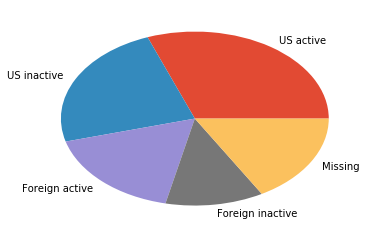

In [37]:
num_rec = google.shape[0]
us_ind = google["jurisdiction"].str.startswith("us")
labels = "US active", "US inactive", "Foreign active", "Foreign inactive", "Missing"
bool_coef = [(True,False),(True,True),(False,False),(False, True)]
sizes = [((us_ind==a[0]) & (google["inactive"]==a[1])).sum() for a in bool_coef]
sizes.append(num_rec - sum(sizes))
_ = plt.pie(sizes,labels=labels)

Pie chart of the number of companies returned from the google query that are in the US or foreign and are active or not. This is just one of thousands of things that you can extract from this rich dataset.  You should be able to see where we made the requests to the opencorporates.com API, how we created and populated the dataframe, and where we created the pie chart.